# Importation of libraries


In [631]:
! pip install catboost

In [632]:
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold

import xgboost as xgb
import lightgbm as lgb
from sklearn.svm import SVR
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Read Datasets


In [633]:
df_train =pd.read_csv("/content/drive/MyDrive/Housing_dataset_train.csv")
df_test =pd.read_csv("/content/drive/MyDrive/Housing_dataset_test.csv")
sub =pd.read_csv("/content/drive/MyDrive/Sample_submission.csv")

In [634]:
df_train.head()

,ID,loc,title,bedroom,bathroom,parking_space,price
0,3583,Katsina,Semi-detached duplex,2.0,2.0,1.0,1149999.565
1,2748,Ondo,Apartment,NaN,2.0,4.0,1672416.689
2,9261,Ekiti,NaN,7.0,5.0,NaN,3364799.814
3,2224,Anambra,Detached duplex,5.0,2.0,4.0,2410306.756
4,10300,Kogi,Terrace duplex,NaN,5.0,6.0,2600700.898


In [635]:
df_test.head()

,ID,loc,title,bedroom,bathroom,parking_space
0,845,Kano,Penthouse,4,1,2
1,1924,Adamawa,Apartment,2,2,4
2,10718,Adamawa,Bungalow,2,7,2
3,12076,Lagos,Mansion,9,5,2
4,12254,Gombe,Semi-detached duplex,5,6,1


In [636]:
sub.head()

,ID
0,845
1,1924
2,10718
3,12076
4,12254


In [637]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14000 entries, 0 to 13999
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             14000 non-null  int64  
 1   loc            12187 non-null  object 
 2   title          12278 non-null  object 
 3   bedroom        12201 non-null  float64
 4   bathroom       12195 non-null  float64
 5   parking_space  12189 non-null  float64
 6   price          14000 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 765.8+ KB


In [638]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   ID             6000 non-null   int64 
 1   loc            6000 non-null   object
 2   title          6000 non-null   object
 3   bedroom        6000 non-null   int64 
 4   bathroom       6000 non-null   int64 
 5   parking_space  6000 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 281.4+ KB


In [639]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14000 entries, 0 to 13999
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             14000 non-null  int64  
 1   loc            12187 non-null  object 
 2   title          12278 non-null  object 
 3   bedroom        12201 non-null  float64
 4   bathroom       12195 non-null  float64
 5   parking_space  12189 non-null  float64
 6   price          14000 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 765.8+ KB


In [640]:
df_train.describe()

,ID,bedroom,bathroom,parking_space,price
count,14000.000000,12201.000000,12195.000000,12189.000000,1.400000e+04
mean,4862.700357,4.308171,3.134235,3.169825,2.138082e+06
std,3818.348214,2.441165,2.035950,1.599415,1.083057e+06
min,0.000000,1.000000,1.000000,1.000000,4.319673e+05
25%,1672.750000,2.000000,1.000000,2.000000,1.393990e+06
50%,3527.000000,4.000000,2.000000,3.000000,1.895223e+06
75%,8011.250000,6.000000,5.000000,4.000000,2.586699e+06
max,12999.000000,9.000000,7.000000,6.000000,1.656849e+07


# Filling of NAN Values

In [641]:
df_train.isna().sum()

ID                  0
loc              1813
title            1722
bedroom          1799
bathroom         1805
parking_space    1811
price               0
dtype: int64

In [642]:
df_train["loc"].fillna(df_train["loc"].mode()[0],inplace=True)
df_train["loc"].isna().values.any()

False

In [643]:
df_train["title"].fillna(df_train["title"].mode()[0],inplace=True)
df_train["title"].isna().values.any()

False

In [644]:
df_train["bedroom"].fillna(df_train["bedroom"].mode()[0],inplace=True)
df_train["bedroom"].isna().values.any()

False

In [645]:
df_train["bathroom"].fillna(df_train["bathroom"].median(),inplace=True)
df_train["bathroom"].isna().values.any()

False

In [646]:
df_train["parking_space"].fillna(df_train["parking_space"].median(),inplace=True)
df_train["parking_space"].isna().values.any()

False

# Exploratory Data Analysis

In [647]:
import seaborn as sns

<Axes: xlabel='title', ylabel='count'>

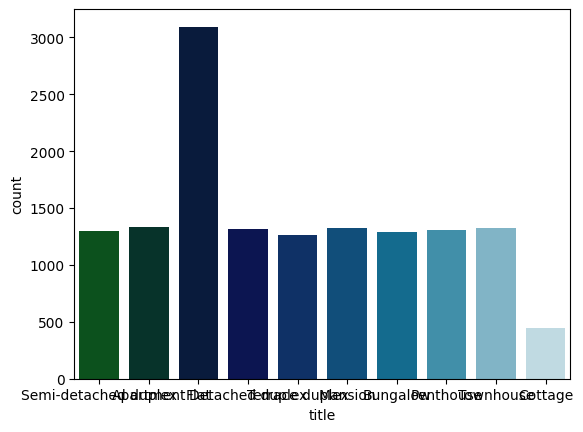

In [648]:
sns.countplot(x="title",data=df_train,palette='ocean')

<Axes: xlabel='title', ylabel='count'>

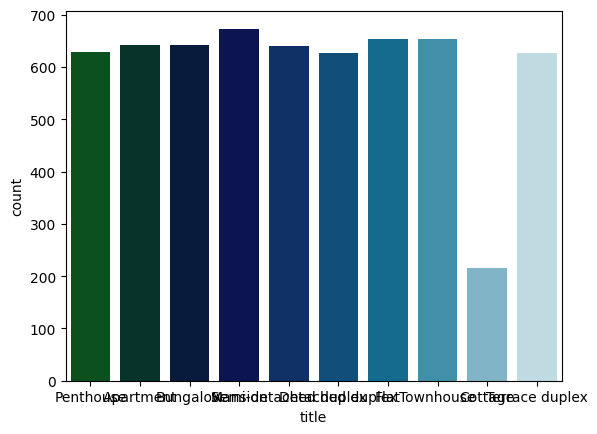

In [649]:
sns.countplot(x="title",data=df_test,palette='ocean')

In [650]:
df_train['title'].unique()

array(['Semi-detached duplex', 'Apartment', 'Flat', 'Detached duplex',
       'Terrace duplex', 'Mansion', 'Bungalow', 'Penthouse', 'Townhouse',
       'Cottage'], dtype=object)

In [651]:
house_counts = df_train['title'].value_counts()

# Calculate percentages
total_houses = len(df_train)
house_percentages = house_counts / total_houses * 100

In [652]:
print(house_percentages)

Flat                    22.100000
Apartment                9.507143
Townhouse                9.478571
Mansion                  9.442857
Detached duplex          9.371429
Penthouse                9.328571
Semi-detached duplex     9.278571
Bungalow                 9.235714
Terrace duplex           9.042857
Cottage                  3.214286
Name: title, dtype: float64


In [653]:
# Step 1: Calculate the average house price for each house type
average_prices = df_train.groupby('title')['price'].mean().reset_index()

# Step 2: Sort house types based on average prices in descending order
ranked_house_types = average_prices.sort_values(by='price', ascending=False)

# Display the ranked house types
print(ranked_house_types)

                  title         price
5               Mansion  3.725768e+06
6             Penthouse  2.628945e+06
3       Detached duplex  2.205883e+06
9             Townhouse  2.056125e+06
4                  Flat  1.972723e+06
8        Terrace duplex  1.927270e+06
7  Semi-detached duplex  1.918468e+06
1              Bungalow  1.733845e+06
0             Apartment  1.567004e+06
2               Cottage  1.307817e+06


In [654]:
df_test["title"].unique()

array(['Penthouse', 'Apartment', 'Bungalow', 'Mansion',
       'Semi-detached duplex', 'Detached duplex', 'Flat', 'Townhouse',
       'Cottage', 'Terrace duplex'], dtype=object)

In [655]:
highest_state = df_train['loc'].value_counts().idxmax()

print("State with the highest number of houses:", highest_state)

State with the highest number of houses: Kaduna


In [656]:
highest_state_1 = df_test['loc'].value_counts().idxmax()

print("State with the highest number of houses:", highest_state_1)

State with the highest number of houses: Benue


In [657]:
average_prices_by_state = df_train.groupby('loc')['price'].mean()

print(average_prices_by_state)

loc
Abia           1.717083e+06
Adamawa        1.905287e+06
Akwa Ibom      2.725454e+06
Anambra        2.337230e+06
Bauchi         1.772961e+06
Bayelsa        3.112322e+06
Benue          1.920461e+06
Borno          1.735704e+06
Cross River    2.507765e+06
Delta          2.712493e+06
Ebonyi         1.635850e+06
Edo            2.310452e+06
Ekiti          2.109220e+06
Enugu          2.272887e+06
Gombe          1.860851e+06
Imo            2.067489e+06
Jigawa         1.735867e+06
Kaduna         2.115429e+06
Kano           2.081931e+06
Katsina        1.947589e+06
Kebbi          1.616372e+06
Kogi           1.763416e+06
Kwara          1.903424e+06
Lagos          4.210546e+06
Nasarawa       2.061764e+06
Niger          1.885325e+06
Ogun           2.564020e+06
Ondo           2.277494e+06
Osun           2.180570e+06
Oyo            2.293159e+06
Plateau        1.942316e+06
Rivers         2.957098e+06
Sokoto         1.681016e+06
Taraba         1.855306e+06
Yobe           1.747938e+06
Zamfara        1

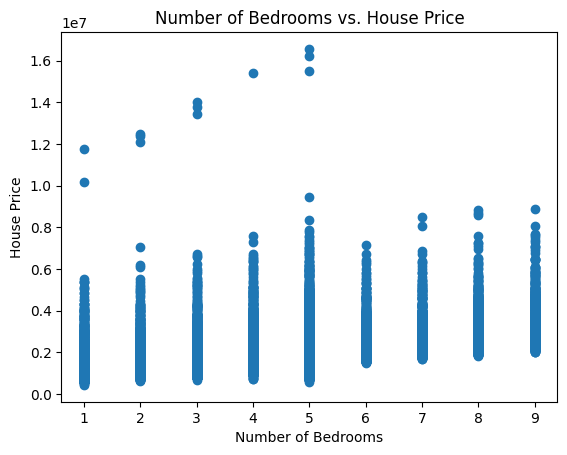

In [658]:
plt.scatter(df_train['bedroom'], df_train['price'])
plt.xlabel('Number of Bedrooms')
plt.ylabel('House Price')
plt.title('Number of Bedrooms vs. House Price')
plt.show()

In [659]:
highest_average_prices_by_state = df_train.groupby('title')['bathroom'].mean().idxmax()
print("House type with highest average number of bathroom:",highest_average_prices_by_state)

House type with highest average number of bathroom: Bungalow


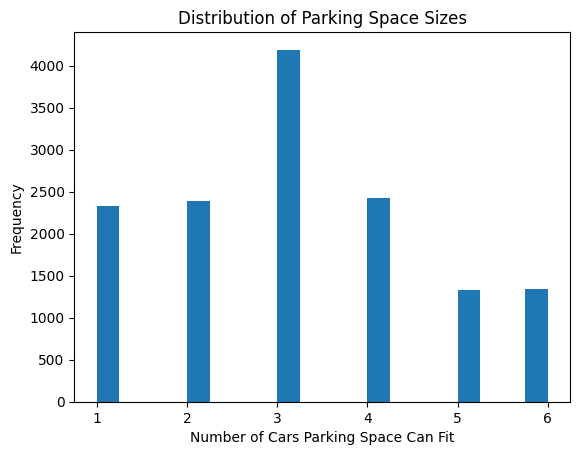

In [660]:
plt.hist(df_train['parking_space'], bins=20) # You can adjust the number of bins for the histogram
plt.xlabel('Number of Cars Parking Space Can Fit')
plt.ylabel('Frequency')
plt.title('Distribution of Parking Space Sizes')
plt.show()

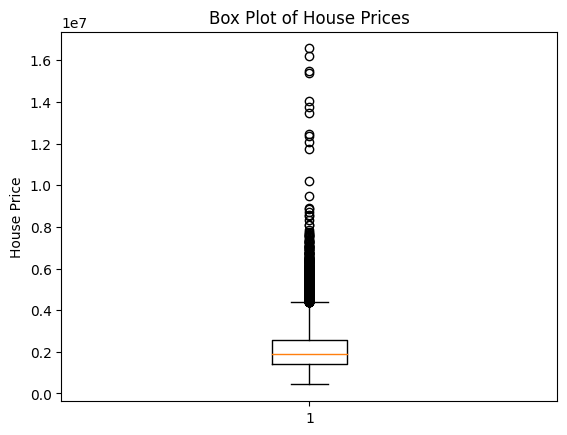

In [661]:
plt.boxplot(df_train['price'])
plt.ylabel('House Price')
plt.title('Box Plot of House Prices')
plt.show()

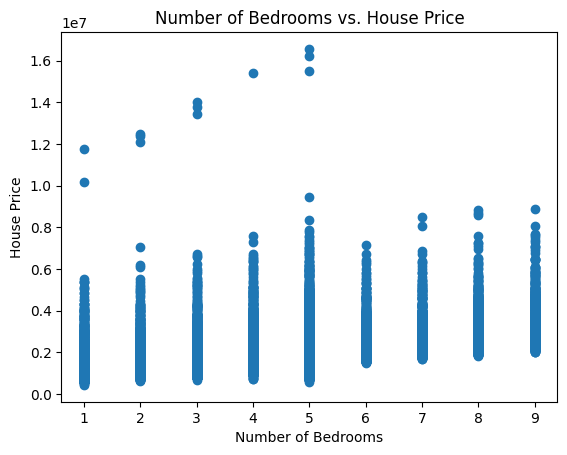

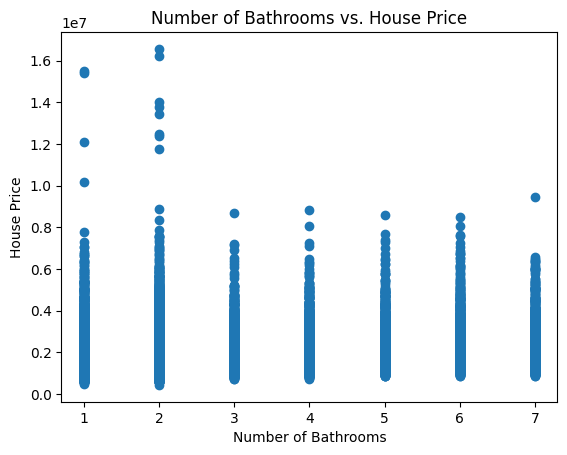

In [662]:
plt.scatter(df_train['bedroom'], df_train['price'])
plt.xlabel('Number of Bedrooms')
plt.ylabel('House Price')
plt.title('Number of Bedrooms vs. House Price')
plt.show()

plt.scatter(df_train['bathroom'], df_train['price'])
plt.xlabel('Number of Bathrooms')
plt.ylabel('House Price')
plt.title('Number of Bathrooms vs. House Price')
plt.show()

In [663]:

import scipy.stats as stats

groups = df_train.groupby('loc')['price'].apply(list)
f_statistic, p_value = stats.f_oneway(*groups)

if p_value < 0.05:
    print("There is a significant difference in house prices between different states.")
else:
    print("There is no significant difference in house prices between different states.")

There is a significant difference in house prices between different states.


In [664]:
high_median_prices_by_state = df_train.groupby('loc')['price'].median().idxmax()


print("State with the highest median house price:", high_median_prices_by_state)

State with the highest median house price: Lagos


In [665]:

top_5_expensive_house_types = df_train.groupby('title')['price'].mean().nlargest(5)

print("Top 5 most expensive house types:")
print(top_5_expensive_house_types)

Top 5 most expensive house types:
title
Mansion            3.725768e+06
Penthouse          2.628945e+06
Detached duplex    2.205883e+06
Townhouse          2.056125e+06
Flat               1.972723e+06
Name: price, dtype: float64


In [666]:
correlation = df_train['bedroom'].corr(df_train['bathroom'])

print("Correlation between the number of bedrooms and bathrooms:", correlation)

Correlation between the number of bedrooms and bathrooms: 0.1906953962596665


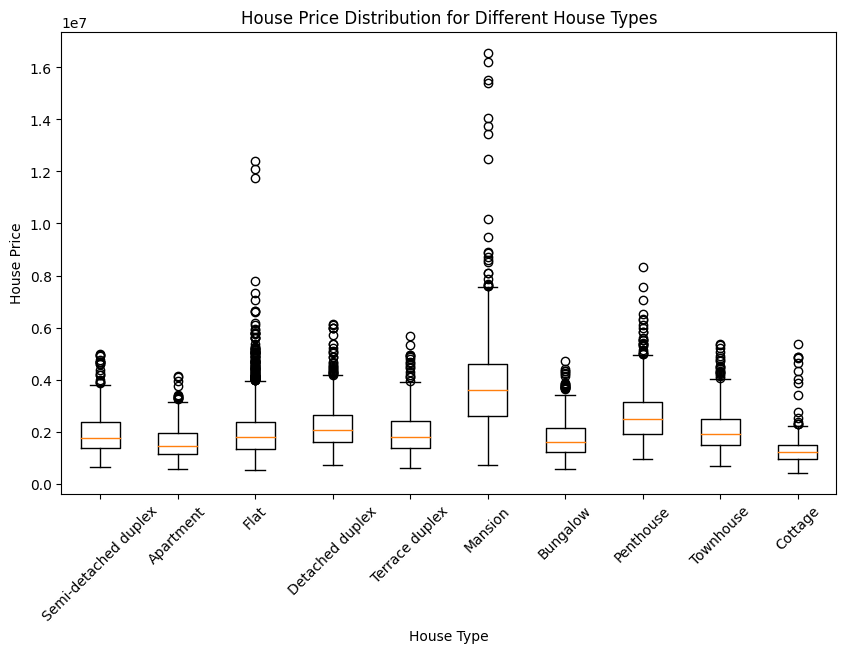

In [667]:

plt.figure(figsize=(10, 6))  # Optional: Adjust the figure size for better visualization
plt.boxplot([df_train[df_train['title'] == title]['price'] for title in df_train['title'].unique()])
plt.xticks(range(1, len(df_train['title'].unique()) + 1), df_train['title'].unique(), rotation=45)
plt.xlabel('House Type')
plt.ylabel('House Price')
plt.title('House Price Distribution for Different House Types')
plt.show()

In [668]:

average_bedrooms_by_type = df_train.groupby('title')['bedroom'].mean()

print(average_bedrooms_by_type)

title
Apartment               4.441773
Bungalow                4.481825
Cottage                 3.226667
Detached duplex         4.409299
Flat                    4.414674
Mansion                 4.435703
Penthouse               4.426493
Semi-detached duplex    4.510393
Terrace duplex          4.429700
Townhouse               4.403919
Name: bedroom, dtype: float64


In [669]:
missing_values = df_train.isnull().sum()

print("Missing values in the dataset:")
print(missing_values)

Missing values in the dataset:
ID               0
loc              0
title            0
bedroom          0
bathroom         0
parking_space    0
price            0
dtype: int64


In [670]:
df_test["loc"].unique()

array(['Kano', 'Adamawa', 'Lagos', 'Gombe', 'Edo', 'Niger', 'Anambra',
       'Benue', 'Ogun', 'Kogi', 'Taraba', 'Yobe', 'Zamfara', 'Borno',
       'Enugu', 'Ekiti', 'Delta', 'Osun', 'Oyo', 'Bauchi', 'Kwara',
       'Katsina', 'Cross River', 'Ondo', 'Akwa Ibom', 'Nasarawa',
       'Ebonyi', 'Plateau', 'Kaduna', 'Sokoto', 'Kebbi', 'Bayelsa',
       'Jigawa', 'Abia', 'Rivers', 'Imo'], dtype=object)

# Feature Engineering

In [671]:
df = df_train.drop("price", axis=1)

In [672]:
data = df.append(df_test)

<ipython-input-672-21d675667cf8>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = df.append(df_test)


In [673]:
# Define the ranking based on size (arranged from smallest to biggest)
house_type_ranks = {
    'Cottage': 1,
    'Bungalow': 2,
    'Townhouse': 3,
    'Terrace duplex': 4,
    'Detached duplex': 5,
    'Semi-detached duplex': 6,
    'Flat': 7,
    'Penthouse': 8,
    'Apartment': 9,
    'Mansion': 10
}

# Map the house types to numerical values based on size ranking
data['title'] = data['title'].map(house_type_ranks)

# Print the updated dataframe
data.head()

,ID,loc,title,bedroom,bathroom,parking_space
0,3583,Katsina,6,2.0,2.0,1.0
1,2748,Ondo,9,5.0,2.0,4.0
2,9261,Ekiti,7,7.0,5.0,3.0
3,2224,Anambra,5,5.0,2.0,4.0
4,10300,Kogi,4,5.0,5.0,6.0


In [674]:
state_to_region = {
    'Lagos': 'South-West',
    'Ogun': 'South-West',
    'Oyo': 'South-West',
    'Osun': 'South-West',
    'Ondo': 'South-West',
    'Ekiti': 'South-West',
    'Kwara': 'North-Central',
    'Kogi': 'North-Central',
    'Benue': 'North-Central',
    'Nasarawa': 'North-Central',
    'Plateau': 'North-Central',
    'Niger': 'North-Central',
    'FCT': 'North-Central',
    'Kano': 'North-West',
    'Kaduna': 'North-West',
    'Jigawa': 'North-West',
    'Katsina': 'North-West',
    'Kebbi': 'North-West',
    'Sokoto': 'North-West',
    'Zamfara': 'North-West',
    'Yobe': 'North-East',
    'Borno': 'North-East',
    'Bauchi': 'North-East',
    'Adamawa': 'North-East',
    'Gombe': 'North-East',
    'Taraba': 'North-East',
    'Akwa Ibom': 'South-South',
    'Cross River': 'South-South',
    'Rivers': 'South-South',
    'Delta': 'South-South',
    'Edo': 'South-South',
    'Bayelsa': 'South-South',
    'Abia': 'South-East',
    'Imo': 'South-East',
    'Enugu': 'South-East',
    'Anambra': 'South-East',
    'Ebonyi': 'South-East',
}

# Create a new column 'Region' by mapping the states to their respective regions
data['Region'] = data['loc'].map(state_to_region)
# test_data['Region'] = test_data['loc'].map(state_to_region)

In [675]:
# Calculate the frequency of each category in the 'loc' column
category_frequencies = data['loc'].value_counts(normalize=True)

# Create a dictionary to map each category to its corresponding frequency
loc_frequency_mapping = category_frequencies.to_dict()

# Map the 'loc' column to its corresponding frequency values
data['loc'] = data['loc'].map(loc_frequency_mapping)

# Print the updated dataframe
data.head()

,ID,loc,title,bedroom,bathroom,parking_space,Region
0,3583,0.02600,6,2.0,2.0,1.0,North-West
1,2748,0.02555,9,5.0,2.0,4.0,South-West
2,9261,0.02530,7,7.0,5.0,3.0,South-West
3,2224,0.02715,5,5.0,2.0,4.0,South-East
4,10300,0.02490,4,5.0,5.0,6.0,North-Central


In [676]:
dummies =pd.get_dummies(data['Region'],drop_first=True )

In [677]:
data=pd.concat([data,dummies],axis='columns')
data

,ID,loc,title,bedroom,bathroom,parking_space,Region,North-East,North-West,South-East,South-South,South-West
0,3583,0.02600,6,2.0,2.0,1.0,North-West,0,1,0,0,0
1,2748,0.02555,9,5.0,2.0,4.0,South-West,0,0,0,0,1
2,9261,0.02530,7,7.0,5.0,3.0,South-West,0,0,0,0,1
3,2224,0.02715,5,5.0,2.0,4.0,South-East,0,0,1,0,0
4,10300,0.02490,4,5.0,5.0,6.0,North-Central,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
5995,1594,0.02530,7,4.0,5.0,2.0,South-West,0,0,0,0,1
5996,2416,0.02580,4,5.0,7.0,1.0,North-East,1,0,0,0,0
5997,10195,0.02620,3,4.0,1.0,4.0,South-West,0,0,0,0,1
5998,9455,0.02585,7,3.0,7.0,5.0,North-East,1,0,0,0,0


In [678]:
data=data.drop(['Region'],axis=1)

In [679]:
data.head()

,ID,loc,title,bedroom,bathroom,parking_space,North-East,North-West,South-East,South-South,South-West
0,3583,0.02600,6,2.0,2.0,1.0,0,1,0,0,0
1,2748,0.02555,9,5.0,2.0,4.0,0,0,0,0,1
2,9261,0.02530,7,7.0,5.0,3.0,0,0,0,0,1
3,2224,0.02715,5,5.0,2.0,4.0,0,0,1,0,0
4,10300,0.02490,4,5.0,5.0,6.0,0,0,0,0,0


In [680]:
data['Bathroom_Bedroom_Ratio'] = data['bathroom'] / data['bedroom']

# Display the DataFrame with the new feature
print(data)

         ID      loc  title  bedroom  bathroom  parking_space  North-East  \
0      3583  0.02600      6      2.0       2.0            1.0           0   
1      2748  0.02555      9      5.0       2.0            4.0           0   
2      9261  0.02530      7      7.0       5.0            3.0           0   
3      2224  0.02715      5      5.0       2.0            4.0           0   
4     10300  0.02490      4      5.0       5.0            6.0           0   
...     ...      ...    ...      ...       ...            ...         ...   
5995   1594  0.02530      7      4.0       5.0            2.0           0   
5996   2416  0.02580      4      5.0       7.0            1.0           1   
5997  10195  0.02620      3      4.0       1.0            4.0           0   
5998   9455  0.02585      7      3.0       7.0            5.0           1   
5999  11736  0.02445     10      6.0       1.0            6.0           0   

      North-West  South-East  South-South  South-West  Bathroom_Bedroom_Rat

In [681]:
data['has_parking'] = data['parking_space'].apply(lambda space: 1 if space>0 else 0)

# Splitting the dataset


In [682]:
x = data[:df.shape[0]]
y = df_train.price
df_test = data[df.shape[0]:]

In [689]:
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.3, random_state=102)

In [683]:
#df_train['price'] = np.sqrt(df_train['price'])

In [684]:
data.head()

,ID,loc,title,bedroom,bathroom,parking_space,North-East,North-West,South-East,South-South,South-West,Bathroom_Bedroom_Ratio,has_parking
0,3583,0.02600,6,2.0,2.0,1.0,0,1,0,0,0,1.000000,1
1,2748,0.02555,9,5.0,2.0,4.0,0,0,0,0,1,0.400000,1
2,9261,0.02530,7,7.0,5.0,3.0,0,0,0,0,1,0.714286,1
3,2224,0.02715,5,5.0,2.0,4.0,0,0,1,0,0,0.400000,1
4,10300,0.02490,4,5.0,5.0,6.0,0,0,0,0,0,1.000000,1


In [685]:
df_train['price'].head()

0    1149999.565
1    1672416.689
2    3364799.814
3    2410306.756
4    2600700.898
Name: price, dtype: float64

# Modelling


1. Linear Regression

In [690]:
model = LinearRegression()

# Train the model using the training data
model.fit(train_x, train_y)

# Make predictions on the test data
y_pred = model.predict(test_x)

# Evaluate the model's performance
mse = mean_squared_error(test_y, y_pred)
r2 = r2_score(test_y, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 613408894096.6533
R-squared: 0.45422151628454943


In [691]:
rmse = np.sqrt(mean_squared_error(test_y, y_pred))

print("Root Mean Squared Error (RMSE):", rmse)

Root Mean Squared Error (RMSE): 783204.2480072827


2. SVM

In [692]:
model1 = SVR()

# Train the model using the training data
model1.fit(train_x, train_y)

# Make predictions on the test data
y_pred1 = model1.predict(test_x)

# Calculate the Root Mean Squared Error (RMSE)
rmse1 = np.sqrt(mean_squared_error(test_y, y_pred1))

print("Root Mean Squared Error (RMSE):", rmse1)

Root Mean Squared Error (RMSE): 1087471.82255941


3. CatBoost Regressor

In [693]:
model2 = CatBoostRegressor()

# Train the model using the training data
model2.fit(train_x, train_y)

# Make predictions on the test data
y_pred2 = model2.predict(test_x)

# Calculate the Root Mean Squared Error (RMSE)
rmse2 = np.sqrt(mean_squared_error(test_y, y_pred))

print("Root Mean Squared Error (RMSE):", rmse2)

Learning rate set to 0.058721
0:	learn: 1062147.0706676	total: 3.87ms	remaining: 3.87s
1:	learn: 1027616.5029207	total: 6.7ms	remaining: 3.34s
2:	learn: 995793.4148498	total: 8.27ms	remaining: 2.75s
3:	learn: 966509.3338674	total: 9.64ms	remaining: 2.4s
4:	learn: 939602.1787219	total: 11ms	remaining: 2.19s
5:	learn: 914946.5729476	total: 12.7ms	remaining: 2.11s
6:	learn: 892517.5186020	total: 14.3ms	remaining: 2.03s
7:	learn: 871522.3435079	total: 15.8ms	remaining: 1.96s
8:	learn: 852678.2059242	total: 18.2ms	remaining: 2s
9:	learn: 835110.7886179	total: 20.2ms	remaining: 2s
10:	learn: 818648.7320369	total: 21.7ms	remaining: 1.96s
11:	learn: 802431.8157347	total: 23.1ms	remaining: 1.9s
12:	learn: 788551.8858575	total: 25.6ms	remaining: 1.95s
13:	learn: 774972.7821071	total: 27.3ms	remaining: 1.92s
14:	learn: 763067.5126880	total: 29.2ms	remaining: 1.92s
15:	learn: 753929.7005863	total: 30.9ms	remaining: 1.9s
16:	learn: 743348.4413844	total: 32.6ms	remaining: 1.88s
17:	learn: 733852.043

In [694]:
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

fold = KFold(n_splits=10, shuffle=True)
lg_oof_pred = []
lg_fold_pred = []
i = 1

for train_index, test_index in fold.split(x, y):

    X_train, X_test = x.iloc[train_index], x.iloc[test_index]
    y_train, y_test = np.sqrt(y.iloc[train_index]), y.iloc[test_index]

    # CatBoost Model
    cat_model = CatBoostRegressor(loss_function='RMSE')
    cat_model.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_test, y_test)], verbose=False)

    preds_cat = cat_model.predict(X_test)
    print("CatBoost RMSE: ", mean_squared_error(y_test, preds_cat ** 2, squared=False))
    lg_oof_pred.append(mean_squared_error(y_test, preds_cat ** 2, squared=False))
    cat_p2 = cat_model.predict(df_test[x.columns])
    lg_fold_pred.append(cat_p2 ** 2)

print("Average RMSE:", np.mean(lg_oof_pred))

CatBoost RMSE:  564200.4646462388
CatBoost RMSE:  476070.475945839
CatBoost RMSE:  472283.31893161254
CatBoost RMSE:  469167.4501143905
CatBoost RMSE:  607816.980184641
CatBoost RMSE:  538162.3524345374
CatBoost RMSE:  641409.3668694245
CatBoost RMSE:  483576.0403900899
CatBoost RMSE:  637183.1267144976
CatBoost RMSE:  631164.1475807144
Average RMSE: 552103.3723811986


4. XGB Regressor

In [695]:
model3 = xgb.XGBRegressor()

# Train the model using the training data
model3.fit(train_x, train_y)

# Make predictions on the test data
y_pred3 = model3.predict(test_x)

# Calculate the Root Mean Squared Error (RMSE)
rmse3 = np.sqrt(mean_squared_error(test_y, y_pred))

print("Root Mean Squared Error (RMSE):", rmse3)

Root Mean Squared Error (RMSE): 783204.2480072827


In [696]:
fold = KFold(n_splits=10, shuffle=True)
lg_oof_pred = []
lg_fold_pred1 = []
i = 1

for train_index, test_index in fold.split(x, y):

    X_train, X_test = x.iloc[train_index], x.iloc[test_index]
    y_train, y_test = np.sqrt(y.iloc[train_index]), y.iloc[test_index]


    # XGBoost Model
    xgb_model = XGBRegressor(objective='reg:squarederror')
    xgb_model.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_test, y_test)], verbose=False)

    preds_xgb = xgb_model.predict(X_test)
    print("XGBoost RMSE: ", mean_squared_error(y_test, preds_xgb ** 2, squared=False))
    lg_oof_pred.append(mean_squared_error(y_test, preds_xgb ** 2, squared=False))
    xgb_p2 = xgb_model.predict(df_test[x.columns])
    lg_fold_pred1.append(xgb_p2 ** 2)

print("Average RMSE:", np.mean(lg_oof_pred))

XGBoost RMSE:  491448.2987075795
XGBoost RMSE:  544550.2365414259
XGBoost RMSE:  543477.6387392667
XGBoost RMSE:  519395.6705935348
XGBoost RMSE:  583148.436432334
XGBoost RMSE:  491562.4642076599
XGBoost RMSE:  606102.6604146175
XGBoost RMSE:  638013.4390785653
XGBoost RMSE:  505431.2794823929
XGBoost RMSE:  699880.2962203947
Average RMSE: 562301.042041777


5. light gbm


In [697]:

train_data = lgb.Dataset(train_x, label=train_y)
test_data = lgb.Dataset(test_x, label=test_y)

params = {
    'objective': 'regression',
    'metric': 'rmse',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9
    # Add more parameters as needed
}


In [698]:
num_rounds = 1000  # Number of boosting rounds
model4 = lgb.train(params, train_data, num_rounds, valid_sets=[train_data, test_data], early_stopping_rounds=50, verbose_eval=50)
y_pred4 = model4.predict(test_x, num_iteration=model4.best_iteration)
mse = mean_squared_error(test_y, y_pred)
rmse4 = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse4}")

/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002369 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 376
[LightGBM] [Info] Number of data points in the train set: 9800, number of used features: 12
[LightGBM] [Info] Start training from score 2139550.279311
Training until validation scores don't improve for 50 rounds
[50]	training's rmse: 573950	valid_1's rmse: 558038
[100]	training's rmse: 507094	valid_1's rmse: 533578
[150]	training's rmse: 480648	valid_1's rmse: 533739
Early stopping, best iteration is:
[120]	training's rmse: 494656	valid_1's rmse: 532200
Root Mean Squared Error (RMSE): 783204.2480072827


In [699]:
lg_fold_pred2=[]
lg_oof_pred = []


params = {
    'n_estimators': 500,
    'colsample_bytree': 0.86,
 'learning_rate': 0.032,
 'max_depth': 7,
 'subsample': 0.85}

fold = KFold(n_splits=10, shuffle=True)#15#5#10
i=1
for train_index, test_index in fold.split(x,y):

    X_train, X_test = x.iloc[train_index], x.iloc[test_index]
    y_train, y_test = np.sqrt(y.iloc[train_index]), y.iloc[test_index]

    model = lgb.LGBMRegressor(**params, objective = "rmse")
    model.fit(X_train,y_train,eval_set=[(X_train,y_train),(X_test, y_test)])

    preds_lgb= model.predict(X_test)
    print("err: ",(mean_squared_error(y_test,preds_lgb**2, squared=False)))
    lg_oof_pred.append(mean_squared_error(y_test,preds_lgb**2,squared=False))
    lg_p2 = model.predict(df_test[x.columns])
    lg_fold_pred2.append(lg_p2**2)




print(np.mean(lg_oof_pred))

Streaming output truncated to the last 5000 lines.
[12]	training's rmse: 269.297	valid_1's rmse: 2.35442e+06
[13]	training's rmse: 265.955	valid_1's rmse: 2.35442e+06
[14]	training's rmse: 262.292	valid_1's rmse: 2.35441e+06
[15]	training's rmse: 258.337	valid_1's rmse: 2.35441e+06
[16]	training's rmse: 254.617	valid_1's rmse: 2.35441e+06
[17]	training's rmse: 251.501	valid_1's rmse: 2.35441e+06
[18]	training's rmse: 249.121	valid_1's rmse: 2.35441e+06
[19]	training's rmse: 245.709	valid_1's rmse: 2.35441e+06
[20]	training's rmse: 242.25	valid_1's rmse: 2.3544e+06
[21]	training's rmse: 238.885	valid_1's rmse: 2.3544e+06
[22]	training's rmse: 235.932	valid_1's rmse: 2.3544e+06
[23]	training's rmse: 233.546	valid_1's rmse: 2.3544e+06
[24]	training's rmse: 230.713	valid_1's rmse: 2.3544e+06
[25]	training's rmse: 227.916	valid_1's rmse: 2.3544e+06
[26]	training's rmse: 225.353	valid_1's rmse: 2.3544e+06
[27]	training's rmse: 222.74	valid_1's rmse: 2.35439e+06
[28]	training's rmse: 220.218	

# Predicting the test


In [517]:
Pred4 = model4.predict(df_test)

In [ ]:
Pred4 = np.square(Pred4)

In [518]:
Pred3 = model3.predict(df_test)

In [ ]:
Pred3 = np.square(Pred3)

In [519]:
Pred2 = model2.predict(df_test)

In [ ]:
p2 = np.square(p2)

In [700]:
#Pred1 = model1.predict(df_test)

In [521]:
Pred = model.predict(df_test)

# Submission


In [522]:
sub["target"] = 0.5*Pred2 + 0.3*Pred3 + 0.2*Pred4

In [703]:
 very = np.round(0.5*lg_fold_pred2 + 0.3*lg_fold_pred + 0.2*lg_fold_pred1)

TypeError: ignored

In [529]:
sub["target"] = np.mean(lg_fold_pred,axis=0)

In [ ]:
sub['target'] = np.square(sub['target'])

In [530]:
sub.head()

,ID,target
0,845,2.208226e+06
1,1924,1.043032e+06
2,10718,1.226381e+06
3,12076,7.710205e+06
4,12254,1.896047e+06


In [531]:
sub.to_csv('excell7.csv',index=False)